# Clustering

### 1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('EastWestAirlines (1).xlsx', sheet_name=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [8]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


There are no missing values to be handled.

There are no non numerical values to be removed as clustering algorithms works only on numerical data only.

In [10]:
df = df.drop(columns=['ID#'])
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


The ID# column is dropped becuse as it doesnot contribute to the clustering.

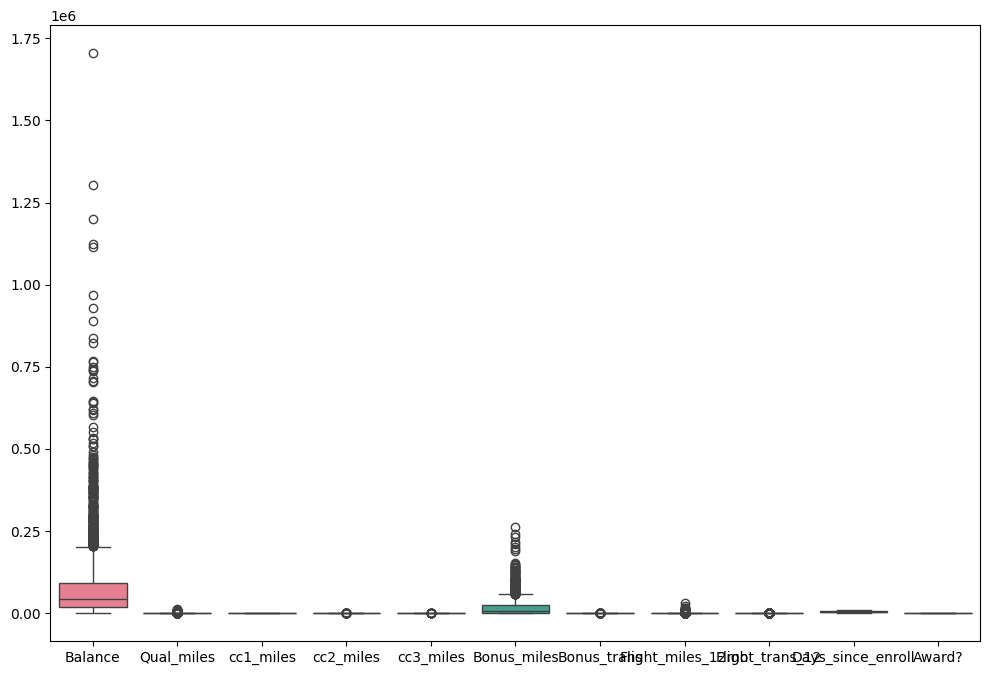

In [12]:
#outlier detection
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.show()

In [13]:
# outlier removal
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(2875, 11)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.438859,0.0,-0.719055,0.0,0.0,-0.783131,-1.081732,-0.378837,-0.409708,1.503693,-0.623072
1,-0.647735,0.0,-0.719055,0.0,0.0,-0.780130,-0.952735,-0.378837,-0.409708,1.488035,-0.623072
2,-0.128773,0.0,-0.719055,0.0,0.0,-0.494075,-0.694742,-0.378837,-0.409708,1.520330,-0.623072
3,-0.752607,0.0,-0.719055,0.0,0.0,-0.759268,-1.081732,-0.378837,-0.409708,1.480206,-0.623072
4,-0.714019,0.0,-0.719055,0.0,0.0,-0.795867,-1.210728,-0.378837,-0.409708,1.475312,-0.623072


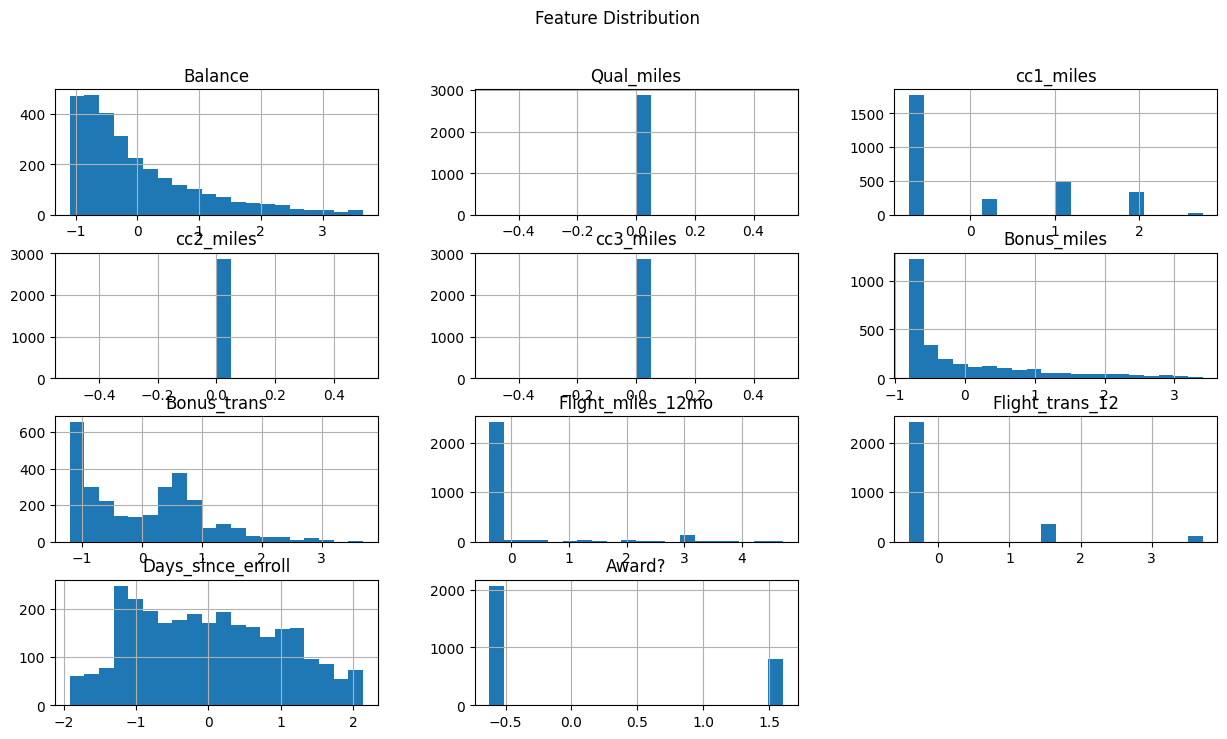

In [16]:
# Exploratory Data Analysis
df_scaled.hist(figsize=(15,8), bins=20)
plt.suptitle('Feature Distribution')
plt.show()

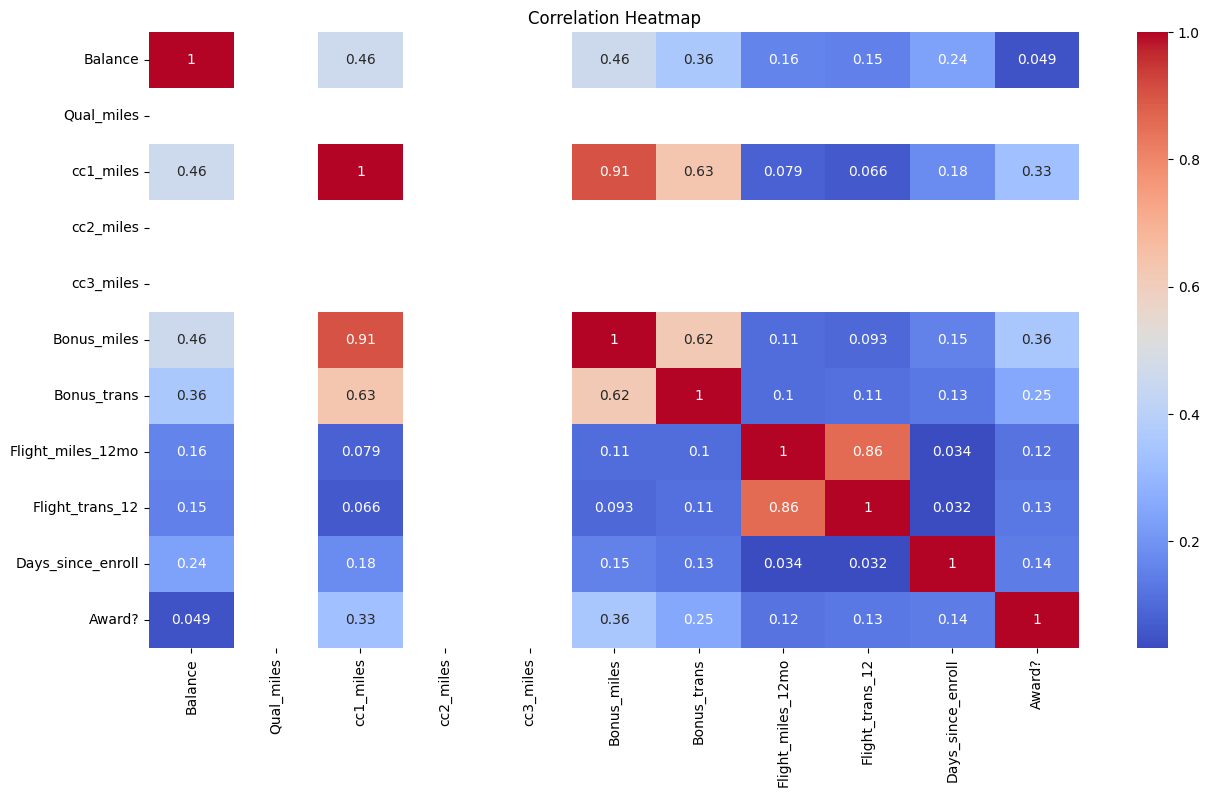

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

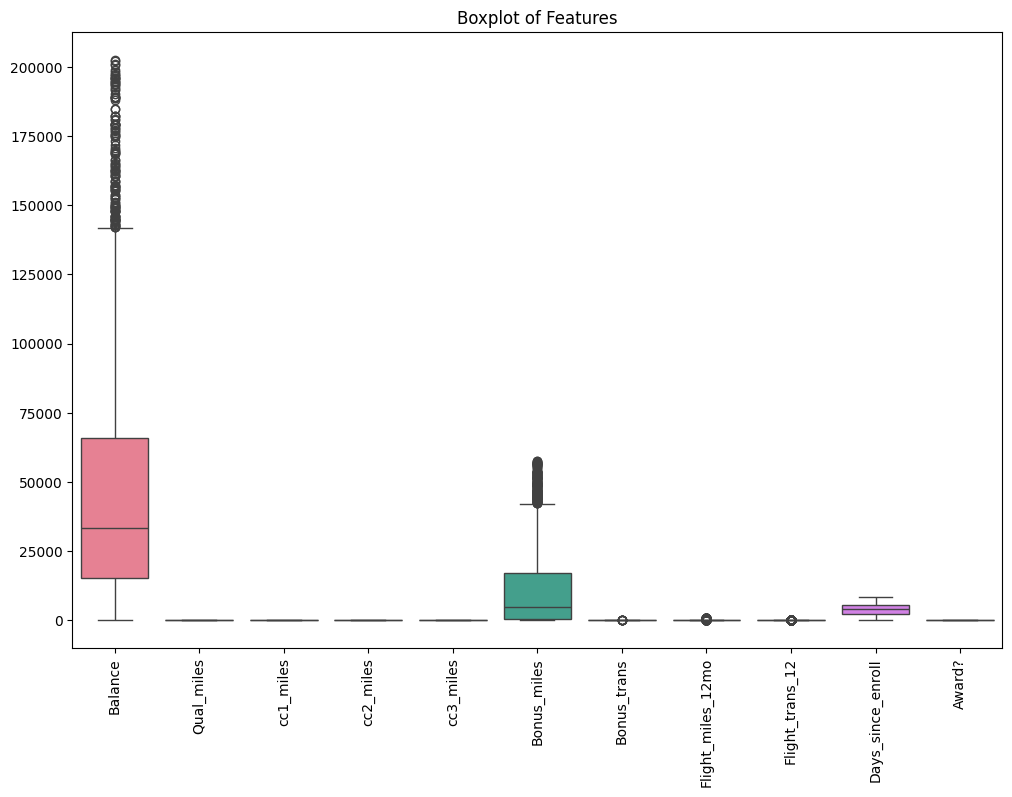

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

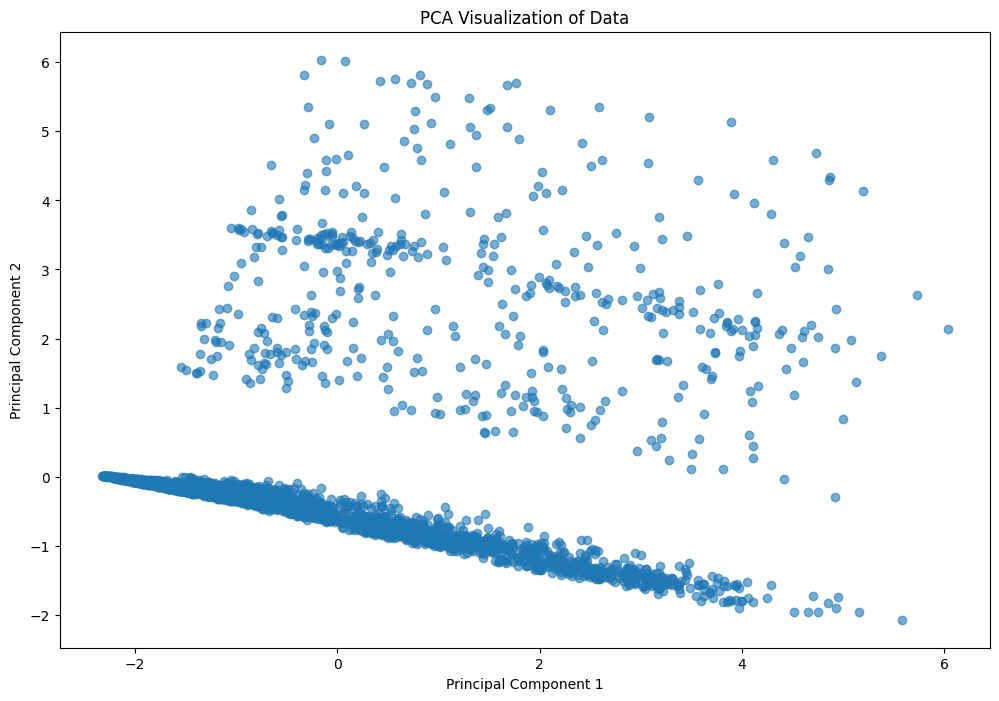

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], alpha = 0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Data')
plt.show()

Principal Component Analysis (PCA) is used to reduce the dimensionality of the dataset while preserving maximum variance. It helps in visualizing high-dimensional data in two dimensions, removes multicollinearity among correlated variables, and enhances clustering efficiency. PCA also aids in identifying hidden patterns and potential clusters before applying clustering algorithms.

### 2. Implementing Clustering Algorithms

In [21]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [24]:
# K-Means Clustering Algorithm
#elbow method to find optimal K

inertia = []
K=range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

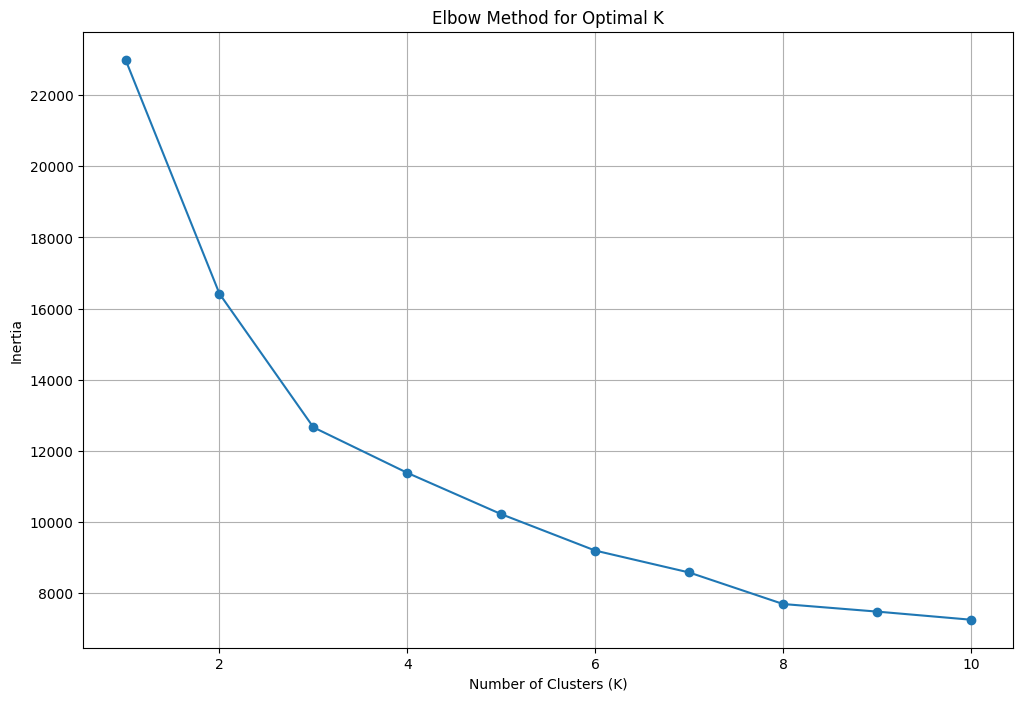

In [26]:
plt.figure(figsize=(12,8))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [36]:
df_kmeans = df.copy()
df_kmeans['KMeans_Cluster'] = kmeans_labels

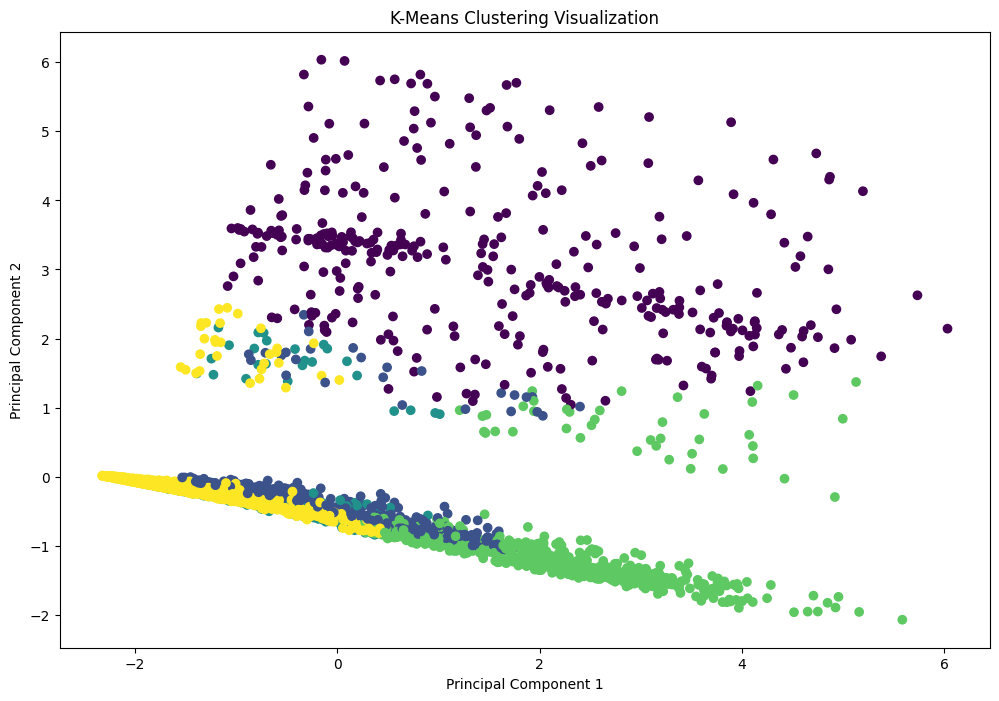

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization')
plt.show()

K-Means clustering was applied to the preprocessed dataset. The Elbow Method was used to determine the optimal number of clusters by analyzing inertia values for different K values. Based on the elbow point, K = 5 was selected. The clustering results were visualized using PCA, showing clear separation among clusters.

In [38]:
# DBSCAN Clustering Algorithm
eps_values = [0.5, 0.8, 1.0, 1.2]
min_samples_values = [5, 10, 15]

In [40]:
res = []

for eps in eps_values:
  for min_pts in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_pts)
    labels = dbscan.fit_predict(df_scaled)
    n_clusters = len(set(labels)) -(1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    res.append({
            "eps": eps,
            "min_samples": min_pts,
            "clusters": n_clusters,
            "noise_points": n_noise
        })


In [41]:
res_df = pd.DataFrame(res)
res_df

,eps,min_samples,clusters,noise_points
0,0.5,5,19,1129
1,0.5,10,9,1483
2,0.5,15,5,1698
3,0.8,5,18,572
4,0.8,10,11,780
5,0.8,15,8,957
6,1.0,5,14,376
7,1.0,10,3,549
8,1.0,15,4,633
9,1.2,5,9,226


DBSCAN clustering was evaluated by varying epsilon and minimum samples parameters. For each parameter combination, the number of clusters and noise points were recorded. Smaller epsilon values resulted in excessive noise and fragmented clusters, whereas larger values merged clusters excessively. The best balance between cluster formation and noise detection was observed for eps = 1.0 and min_samples = 5, which produced a reasonable number of clusters with moderate noise.

In [42]:
res_df.sort_values(by=['clusters', 'noise_points'])

,eps,min_samples,clusters,noise_points
7,1.0,10,3,549
11,1.2,15,4,440
8,1.0,15,4,633
2,0.5,15,5,1698
10,1.2,10,6,352
5,0.8,15,8,957
9,1.2,5,9,226
1,0.5,10,9,1483
4,0.8,10,11,780
6,1.0,5,14,376


In [43]:
dbscan_best = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan_best.fit_predict(df_scaled)

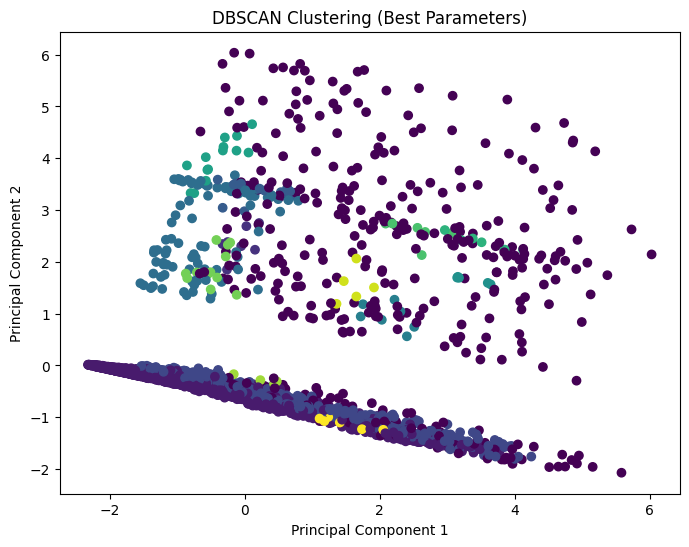

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=dbscan_labels)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering (Best Parameters)")
plt.show()

The DBSCAN clustering results were visualized using Principal Component Analysis (PCA). The plot shows multiple density-based clusters along with noise points that do not belong to any cluster. Unlike K-Means, DBSCAN identified clusters of arbitrary shapes and explicitly detected outliers. The presence of noise points and irregular cluster boundaries indicates effective density-based clustering.

### 3. Cluster Analysis and Interpretation

K-Means effectively divided customers into well-defined groups representing different levels of engagement, travel frequency, and loyalty. These clusters can help in designing targeted marketing and reward strategies.

DBSCAN successfully detected dense customer groups and isolated noise points without pre-defining the number of clusters. This makes it useful for identifying outliers and irregular customer behavior.

K-Means provides structured and interpretable customer segments

DBSCAN highlights density-based patterns and detects outliers

### 4. Evaluation and Performance Metrics

In [47]:
# K-Means Silhouette Score
kmeans_silhuette = silhouette_score(df_scaled, kmeans_labels)
kmeans_silhuette

np.float64(0.24173542157075825)

In [48]:
#DBSCAN Silhouette Score
dbscan_mask = dbscan_labels !=-1
dbscan_filtered_data = df_scaled[dbscan_mask]
dbscan_filtered_labels = dbscan_labels[dbscan_mask]

dbscan_silhouette = silhouette_score(
    dbscan_filtered_data,
    dbscan_filtered_labels
)
dbscan_silhouette

np.float64(0.18413575599507226)

K-Means achieved a higher silhouette score, indicating better separation, while DBSCAN showed slightly lower scores due to its density-based nature and noise handling.